In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import wordnet

In [2]:
df=pd.read_csv("C:/Users/ARAVINDH/Downloads/Elon_musk.csv",encoding="ISO-8859-1")

In [3]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [5]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [6]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARAVINDH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ARAVINDH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ARAVINDH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ARAVINDH\AppData\Roaming\nltk_data...


True

In [19]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [20]:
df["Text"] = df["Text"].apply(lambda x: clean_text(x))
df.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [21]:
df.drop(['Unnamed: 0'],axis=1)
df.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [22]:
#Add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [23]:
sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Text"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [24]:
df

,Unnamed: 0,Text,neg,neu,pos,compound
0,1,im alien,0.000,1.000,0.000,0.0000
1,2,id_aa_carmack ray trace cyberpunk hdr next-lev...,0.000,1.000,0.000,0.0000
2,3,joerogan spotify great interview,0.000,0.423,0.577,0.6249
3,4,doge underestimate,0.688,0.312,0.000,-0.2960
4,5,teslacn congratulation tesla china amazing exe...,0.000,0.510,0.490,0.8271
...,...,...,...,...,...,...
1994,1995,flcnhvy true sound surreal negative propaganda...,0.294,0.412,0.294,-0.0000
1995,1996,ppathole make sure read ur term amp condition ...,0.000,0.620,0.380,0.5994
1996,1997,teslagong ppathole samwise gamgee,0.000,1.000,0.000,0.0000
1997,1998,ppathole altho dumb dumber,0.744,0.256,0.000,-0.7003


In [25]:
# add number of characters column
df["nb_chars"] = df["Text"].apply(lambda x: len(x))

In [27]:
# add number of words column
df["nb_words"] = df["Text"].apply(lambda x: len(x.split(" ")))
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [28]:
# add number of words column
df["nb_words"] = df["Text"].apply(lambda x: len(x.split(" ")))
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [30]:
documents=[TaggedDocument(doc, [i]) for i, doc in enumerate(df["Text"].apply(lambda x: x.split(" ")))]

In [31]:
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [32]:
# transform each Comment into a vector data
doc2vec_df = df["Text"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [33]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["Text"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index

In [35]:
df = pd.concat([df, tfidf_df], axis=1)
df

,Unnamed: 0,Text,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,...,word_wholemarsblog,word_work,word_would,word_wow,word_yeah,word_year,word_yes,word_you,word_yup,word_zero
0,1,im alien,0.000,1.000,0.000,0.0000,9,2,0.026958,0.039403,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,id_aa_carmack ray trace cyberpunk hdr next-lev...,0.000,1.000,0.000,0.0000,52,7,-0.065968,-0.044641,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,joerogan spotify great interview,0.000,0.423,0.577,0.6249,32,4,-0.076359,0.042146,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,4,doge underestimate,0.688,0.312,0.000,-0.2960,18,2,0.049533,0.004018,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,5,teslacn congratulation tesla china amazing exe...,0.000,0.510,0.490,0.8271,72,10,0.000905,0.030404,...,0.0,0.0,0.0,0.0,0.0,0.416667,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995,flcnhvy true sound surreal negative propaganda...,0.294,0.412,0.294,-0.0000,77,12,0.078280,-0.093972,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1995,1996,ppathole make sure read ur term amp condition ...,0.000,0.620,0.380,0.5994,58,10,-0.035337,0.037769,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1996,1997,teslagong ppathole samwise gamgee,0.000,1.000,0.000,0.0000,33,4,0.025459,-0.084657,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1997,1998,ppathole altho dumb dumber,0.744,0.256,0.000,-0.7003,26,4,-0.048674,-0.063393,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

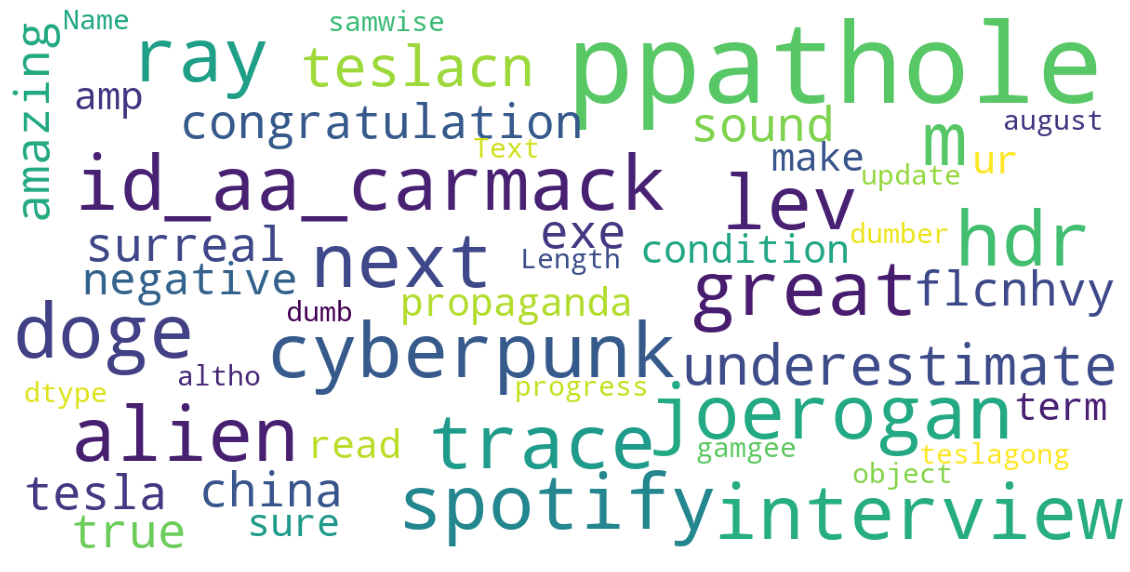

In [46]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df["Text"])